<!--
 Copyright 2022 TsumiNa
 
 Licensed under the Apache License, Version 2.0 (the "License");
 you may not use this file except in compliance with the License.
 You may obtain a copy of the License at
 
     http://www.apache.org/licenses/LICENSE-2.0
 
 Unless required by applicable law or agreed to in writing, software
 distributed under the License is distributed on an "AS IS" BASIS,
 WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
 See the License for the specific language governing permissions and
 limitations under the License.



### 演習11）

この演習では，`preset`モジュールを通して，内蔵する５８種類の元素特徴を抽出する．

`xenonpy.destatools.preset`は`xenonpy`の内臓データとユーザーが指定されたフォルダに置いてあるデータを簡単に読み取るモジュールである．`preset`の他の機能を知りたい場合，サンプルコード [dataset_and_preset](https://nbviewer.org/github/yoshida-lab/XenonPy/blob/master/samples/dataset_and_preset.ipynb) を参考しなさい．

In [1]:
%run common_setting.ipynb

from xenonpy.datatools import preset

preset

<Preset> includes:
"dataset_elements_completed": /Users/liuchang/.xenonpy/dataset/elements_completed.pd.xz
"dataset_atom_init": /Users/liuchang/.xenonpy/dataset/atom_init.pd.xz
"dataset_elements": /Users/liuchang/.xenonpy/dataset/elements.pd.xz
"mp_structure": /Users/liuchang/.xenonpy/userdata/mp_structure.pd.xz
"mp_inorganic": /Users/liuchang/.xenonpy/userdata/mp_inorganic.pd.xz
"mp_samples": /Users/liuchang/.xenonpy/userdata/mp_samples.pd.xz

In [2]:
elems = preset.dataset_elements  # raw data
elems_completed = preset.dataset_elements_completed  # completed data

rawデータ（欠損データがある）

In [3]:
elems

,atomic_number,atomic_radius,atomic_radius_rahm,atomic_volume,atomic_weight,boiling_point,brinell_hardness,bulk_modulus,c6,c6_gb,...,vdw_radius_bondi,vdw_radius_dreiding,vdw_radius_mm3,vdw_radius_rt,vdw_radius_truhlar,vdw_radius_uff,sound_velocity,vickers_hardness,Polarizability,youngs_modulus
H,1,79.0,154.0,14.1,1.008000,20.280,NaN,NaN,6.499027,6.51,...,120.0,319.5,162.0,110.0,NaN,288.6,1270.0,NaN,0.666793,NaN
He,2,NaN,134.0,31.8,4.002602,4.216,NaN,NaN,1.420000,1.47,...,140.0,NaN,153.0,NaN,NaN,236.2,970.0,NaN,0.205052,NaN
Li,3,155.0,220.0,13.1,6.940000,1118.150,NaN,11.0,1392.000000,1410.00,...,181.0,NaN,255.0,NaN,NaN,245.1,6000.0,NaN,24.330000,4.9
Be,4,112.0,219.0,5.0,9.012183,3243.000,600.0,130.0,227.000000,214.00,...,NaN,NaN,223.0,NaN,153.0,274.5,13000.0,1670.0,5.600000,287.0
B,5,98.0,205.0,4.6,10.810000,3931.000,NaN,320.0,99.500000,99.20,...,NaN,402.0,215.0,NaN,192.0,408.3,16200.0,49000.0,3.030000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fl,114,NaN,NaN,NaN,289.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mc,115,NaN,NaN,NaN,288.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lv,116,NaN,NaN,NaN,293.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ts,117,NaN,NaN,NaN,294.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


連鎖方程式による多重代入法でデータを補完（multivariate imputation by chained equations; MICE）

In [4]:
elems_completed

,atomic_number,atomic_radius,atomic_radius_rahm,atomic_volume,atomic_weight,boiling_point,bulk_modulus,c6_gb,covalent_radius_cordero,covalent_radius_pyykko,...,num_s_valence,period,specific_heat,thermal_conductivity,vdw_radius,vdw_radius_alvarez,vdw_radius_mm3,vdw_radius_uff,sound_velocity,Polarizability
H,1.0,79.000000,154.0,14.100000,1.008000,20.280,56.799640,6.510000,31.0,32.0,...,1.0,1.0,1.122728,0.1805,110.0,120.0,162.0,288.6,1270.000000,0.666793
He,2.0,147.832643,134.0,31.800000,4.002602,4.216,85.106630,1.470000,28.0,46.0,...,2.0,1.0,5.188000,0.1513,140.0,143.0,153.0,236.2,970.000000,0.205052
Li,3.0,155.000000,220.0,13.100000,6.940000,1118.150,11.000000,1410.000000,128.0,133.0,...,1.0,2.0,3.489000,85.0000,182.0,212.0,255.0,245.1,6000.000000,24.330000
Be,4.0,112.000000,219.0,5.000000,9.012183,3243.000,130.000000,214.000000,96.0,102.0,...,2.0,2.0,1.824000,190.0000,153.0,198.0,223.0,274.5,13000.000000,5.600000
B,5.0,98.000000,205.0,4.600000,10.810000,3931.000,320.000000,99.200000,84.0,85.0,...,2.0,2.0,1.025000,27.0000,192.0,191.0,215.0,408.3,16200.000000,3.030000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Th,90.0,180.000000,289.0,19.800000,232.037700,5060.000,54.000000,2513.278129,206.0,175.0,...,2.0,7.0,0.113000,54.0000,245.0,293.0,274.0,339.6,2490.000000,32.100000
Pa,91.0,161.000000,285.0,15.000000,231.035880,4300.000,145.399684,2039.299326,200.0,169.0,...,2.0,7.0,0.121000,47.0000,243.0,288.0,264.0,342.4,5621.547555,25.400000
U,92.0,138.000000,283.0,12.500000,238.028910,4018.000,100.000000,2491.292580,196.0,170.0,...,2.0,7.0,0.115000,27.0000,241.0,271.0,252.0,339.5,3155.000000,24.900000
Np,93.0,130.000000,280.0,21.100000,237.000000,4175.000,124.101714,2398.576467,190.0,171.0,...,2.0,7.0,0.543388,6.0000,239.0,282.0,252.0,342.4,2999.089592,24.800000


ご覧の通り，内臓データは `pandas.DataFrame` の型で保存されている．

#### 可視化

Mix-Max スケーリング

In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()

elems = pd.DataFrame(scaler.fit_transform(elems), index=elems.index, columns=elems.columns)
elems_completed = pd.DataFrame(scaler.fit_transform(elems_completed), index=elems_completed.index, columns=elems_completed.columns)

Heatmapを描く

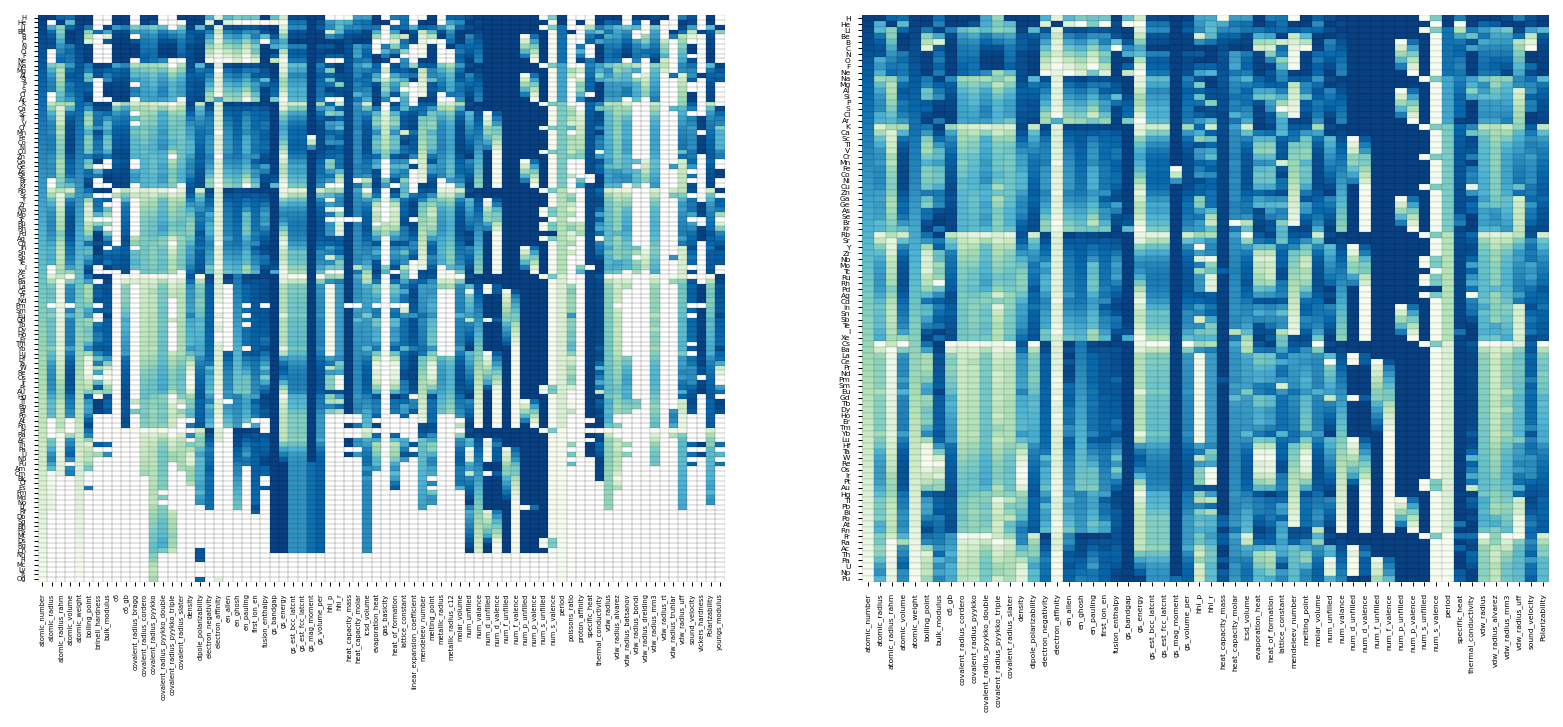

In [6]:
import seaborn as sns
import numpy as np

from matplotlib import cm as cm
from matplotlib import pyplot as plt


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5), dpi=150)
plt.rcParams['hatch.linewidth'] = 0.05


ax1 = sns.heatmap(elems, ax=ax1, cmap=cm.GnBu_r, linecolor='k', linewidths=0.05, xticklabels=True, yticklabels=True, cbar=False, antialiased=True)
ax1.tick_params(axis='x', labelsize=35 / np.sqrt(len(elems)), size=2, width=.5)
ax1.tick_params(axis='y', labelsize=35 / np.sqrt(len(elems)), size=2, width=.5)

ax2 = sns.heatmap(elems_completed, ax=ax2, cmap=cm.GnBu_r, linecolor='k', linewidths=0.05, xticklabels=True, yticklabels=True, cbar=False, antialiased=True)
ax2.tick_params(axis='x', labelsize=35 / np.sqrt(len(elems_completed)), size=2, width=.5)
ax2.tick_params(axis='y', labelsize=35 / np.sqrt(len(elems_completed)), size=2, width=.5)
